In [7]:
# SQL HW 1 - Employee Database
import pandas as pd
import numpy as np
import pandas as dataframe
import matplotlib.pyplot as plt
import psycopg2
import pandas.io.sql as sqlio
import sqlalchemy
from sqlalchemy import create_engine

#sqlalchemy SQL table import steps
engine = create_engine('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
                      .format(username='postgres', 
                           password='Welcome32!',
                           ipaddress='localhost', 
                           port='5432', 
                           dbname='SQL_HW1_EE_db'))
connection = engine.connect()

In [8]:
connection

In [9]:
#import and read salaries sql table as df
salaries_df = pd.read_sql_table('salaries', connection)
salaries_df.head(5)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [10]:
#import and read titles sql table as df
titles_df = pd.read_sql_table('titles', connection)
titles_df.head(5)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,NaT
1,10002,Staff,1996-08-03,NaT
2,10003,Senior Engineer,1995-12-03,NaT
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,NaT


In [11]:
#merge salaries and titles df on emp_no column
main_df = pd.merge(salaries_df,titles_df, on= 'emp_no')
main_df.dtypes

emp_no                  int64
salary                  int64
from_date_x    datetime64[ns]
to_date_x      datetime64[ns]
title                  object
from_date_y    datetime64[ns]
to_date_y      datetime64[ns]
dtype: object

In [77]:
#drop unneeded columns
main_df.drop(['from_date_x','to_date_x','from_date_y','to_date_y'], axis=1)
main_df.head(5)

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,NaT
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,NaT
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,NaT
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,NaT


In [78]:
#group merged df to set average salary by title
avg_sal = main_df.groupby(['title'])['salary'].mean()
unique_title = main_df.groupby(['title'])['title'].nunique()

In [79]:
#dataframe the above lists
bar_df=pd.DataFrame({"Job Title": (unique_title), "Avg Salary":(avg_sal)})

In [80]:
#insert index column
bar_df.reset_index(level=0, inplace=True)

In [81]:
bar_df

,title,Job Title,Avg Salary
0,Assistant Engineer,1,48493.204786
1,Engineer,1,48539.781423
2,Manager,1,51531.041667
3,Senior Engineer,1,48506.751806
4,Senior Staff,1,58503.286614
5,Staff,1,58465.271904
6,Technique Leader,1,48580.505772


([<matplotlib.axis.XTick at 0x179af9d3cc0>,
 <a list of 7 Text xticklabel objects>)

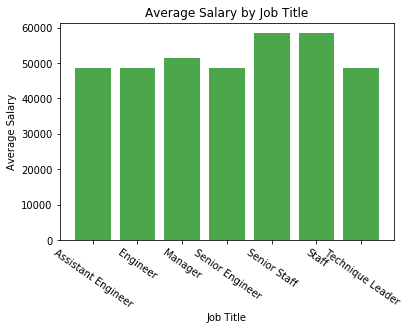

In [90]:
# use the avg salary data by unique titles to plot the bar chart
plt.bar(x_axis, avg_sal, color='g', alpha=0.7, align="center")
plt.title("Average Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, bar_df['title'], rotation=-35)


In [75]:
# output a png of the above graph
plt.savefig("AvgSalary_byTitle.png")
plt.show()

<Figure size 432x288 with 0 Axes>